# Bevaring av bevegelsesmengde

I dette eksperimentet har vi kolidert to vogner. Målet med forsøke er å utforske hvordan bevegelsesmengden til vognene utvikler seg. 
Vi kjørte vognene i spor, og brukte verktøy for å måle fart og posisjon over tid. Vi har laget et program for å tolke dataene vi tilegnet oss i målingene. 

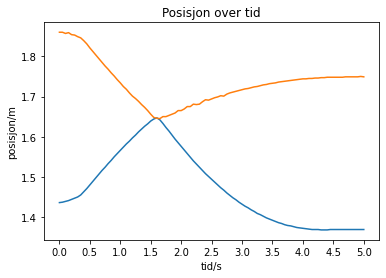

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
m1 = 578.7 # gram
m2 = 912.8 # gram
data = np.loadtxt('forsok_23.txt', skiprows = 7)
tid = data[:,0]
pos1 = data[:,1]
pos2 = data[:,4]

plt.plot(tid, pos1)
plt.plot(tid, -(pos2)+2.796)
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid")
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]);

Vi har startet med å importere de nødvendige bibliotekene og definere variabler. Variablene "m1" og "m2" gir massen til vognene, resten er arrayer med data. Grafen vi har plottet her er posisjonsdataen til de to vognene. Ettersom målingene av posisjon ble forskjøvet har vi redigert resultatet for å mer nøyaktig representere kolisjonen. Tallet vi legger til er summen av toppungtene

In [2]:
for i in range(0,100):
    if pos1[i+1] < pos1[i] > pos1[i-1]:
        print(i)
    else:
        continue
        
for i in range(0,100):
    if pos2[i+1] < pos2[i] > pos2[i-1]:
        print(i)
    else:
        continue

32
2
33
45
49
54


In [3]:
pos2[32]+pos1[32]

2.7969999999999997

For å finne topp- og bunnunktene kjører vi posisjonsdataene gjennom en for-løkke. Løkken skjekker om punktene før og etter et hvert punkt begge er høyere eller lavere enn det forrige. Vi kom med denne metoden frem til et toppunkt i det 33. datapunktet, men grunnet ugjevn måling fungerte ikke den samme metoden på for bunnpunkt.

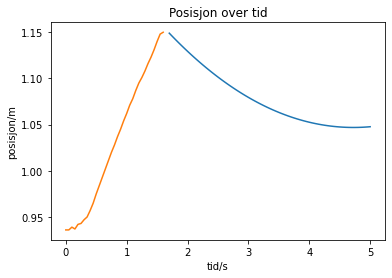

67

In [4]:
y_data = pos2[34:]
x_data = tid[34:]

def funksjon(x, a, b, c, d):
    return a * x**3 + b*x**2 + c*x + d

#plt.plot(x_data, y_data, "xb")

popt, pcov = curve_fit(funksjon, x_data, y_data)

xverdier = np.linspace(tid[34], tid[len(tid)-1], len(pos2)-len(pos2[:34]))
yverdier = funksjon(xverdier, *popt)

plt.plot(xverdier, yverdier)
plt.plot(tid[:33], pos2[:33])
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid")
plt.show()             
len(xverdier)

For å gjevne ut grafene plottet vi en regresjonsmodell. Regresjonen ble gjort i to omganger. Her i den førsste delen fant vi en passende funksjon fra og med punkt 33 og til slutten av målingene.

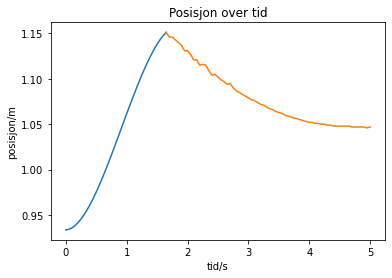

34

In [5]:
y_data_2 = pos2[:34]
x_data_2 = tid[:34]

def funksjon(x, a, b, c, d):
    return a * x**3 + b*x**2 + c*x + d

#plt.plot(x_data_2, y_data_2, "xb")

popt, pcov = curve_fit(funksjon, x_data_2, y_data_2)

xverdier_2 = np.linspace(tid[0], tid[33], len(pos2[:34]))
yverdier_2 = funksjon(xverdier_2, *popt)

plt.plot(xverdier_2, yverdier_2)
plt.plot(tid[33:], pos2[33:])
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid")
plt.show()             
len(xverdier_2)

Regresjonsmodellen for resten av grafen lager vi her og slår de sammen senere. Koden vi har brukt er lik her som i forrige celle.

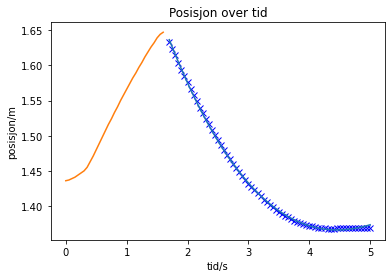

In [6]:
y_data_1 = pos1[34:]
x_data_1 = tid[34:]

plt.plot(x_data_1, y_data_1, "xb")

popt, pcov = curve_fit(funksjon, x_data_1, y_data_1)

xverdier_1 = np.linspace(tid[34], tid[len(tid)-1], len(pos1)-len(pos1[:34]))
yverdier_1 = funksjon(xverdier_1, *popt)

plt.plot(xverdier_1, yverdier_1)
plt.plot(tid[:33], pos1[:33])
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid")
plt.show()  

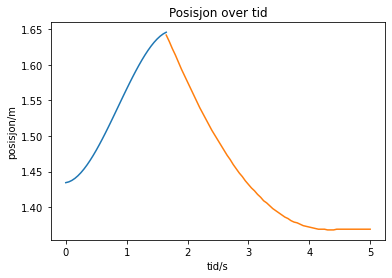

In [7]:
y_data_3 = pos1[:34]
x_data_3 = tid[:34]

#plt.plot(x_data_3, y_data_3, "xb")

popt, pcov = curve_fit(funksjon, x_data_3, y_data_3)

xverdier_3 = np.linspace(tid[0], tid[33], len(pos1[:34]))
yverdier_3 = funksjon(xverdier_3, *popt)

plt.plot(xverdier_3, yverdier_3)
plt.plot(tid[33:], pos1[33:])
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid")
plt.show() 

I disse to neste cellene gjør vi akkurat det samme for å lage en regresjonsmodell av den andre grafen. 

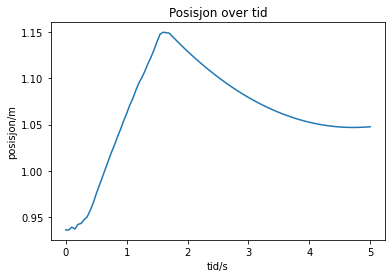

In [8]:
plot_x = []
plot_y = []

plot_x.extend(tid[:33])
plot_x.extend(xverdier)
plot_y.extend(pos2[:33])
plot_y.extend(yverdier)

plt.plot(plot_x, plot_y)
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid");

Dette er resultatet for regresjonmodell av posisjonsgraf 2

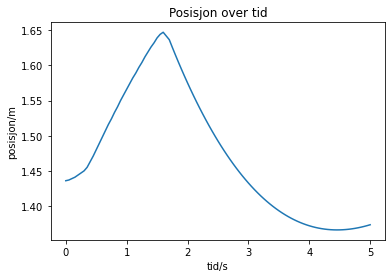

In [9]:
plot_x_1 = []
plot_y_1 = []

plot_x_1.extend(tid[:33])
plot_x_1.extend(xverdier_1)
plot_y_1.extend(pos1[:33])
plot_y_1.extend(yverdier_1)

plt.plot(plot_x_1, plot_y_1)
plt.xlabel("tid/s")
plt.ylabel("posisjon/m")
plt.title("Posisjon over tid");

Dette er resultatet for regresjonsmodell av posisjonsgraf 2

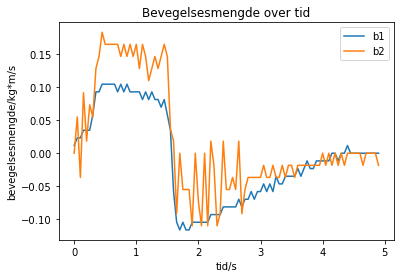

In [10]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (pos1[i+1]-pos1[i])/(tid[i+1]-tid[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (pos2[i+1]-pos2[i])/(tid[i+1]-tid[i])
    fart2.append(fart)
    
b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)
plt.plot(tid[:99], b1, label = 'b1')
plt.plot(tid[:99], b2, label = 'b2')
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.legend();

Her har vi plottet grafene som viser bevegelsesmengden til de to vognene over tid. Vi fikk fart som data fra målingene, og har dermed bare multiplisert alle punktene med massen til vognen som tilhører hver fartsgraf. På grafen ser vi at begge vognene går fra positiv til negativ bevegelsesmengde. Med tanke på at de kjørte mot hverandre i motsatt retning i et fast spor, vil ikke dette resultatet gi mye mening. Målingene til vogn 2 er her også veldig ugjevne. Vi ser at bevegelsesmengden varierer mellom -0.10 og 0, noe som heller ikke vil gi mening i henhold til forsøket vi utførte. Ingen betydelige ytre krefter kan få vognene til å kjøre igjen etter de stopper

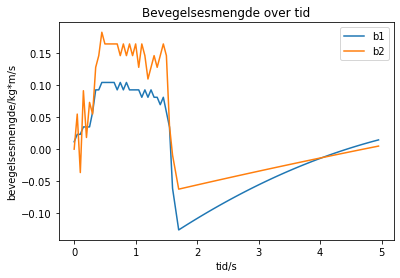

In [11]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (plot_y_1[i+1]-plot_y_1[i])/(plot_x_1[i+1]-plot_x_1[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (plot_y[i+1]-plot_y[i])/(plot_x[i+1]-plot_x[i])
    fart2.append(fart)


b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.plot(plot_x_1[:len(plot_x_1)-1], b1, label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], b2, label = 'b2')
plt.legend();

For å fjerne hakkene i grafen kjørte vi andre halvdel gjennom regresjon for å gjevne den ut. Vi får litt feilmargin på grunn av dette, men grafen blir mer logisk. Grafen vi ser her er resultatet. 

ser at den krysser igjen før 5 sek, sikkert pågrunn av regresjonen vi har gjort

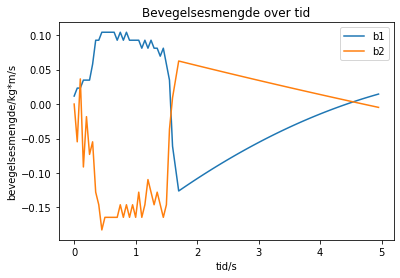

In [12]:
plt.plot(plot_x_1[:len(plot_x_1)-1], b1, label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], -b2, label = 'b2')
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.legend();

For at Grafene skal gi mening og si oss noe om vognenes rettninger har vi snudd den ene grafen. Her ser vi tydelig at vognene koliderer og sender hverandre tilbake i motsatt rettning. Regresjonsmodellen forteller oss at de igjen bytter rettning helt mot slutten av målingene, men det er bare regresjonsmodellen som gir oss feilmargin

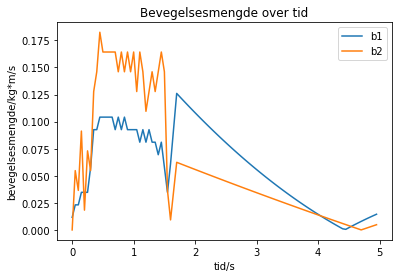

In [13]:
plt.plot(plot_x_1[:len(plot_x_1)-1], abs(b1), label = 'b1')
plt.plot(plot_x[:len(plot_x)-1], abs(b2), label = 'b2')
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.legend();

Her ser vi begge vognenes grafer, men her med mer fokus på bevegelsesmengden. Vi kan se på grafene at vogn 2 overførte mer av sin bevegelses mengde over til vogn 1 før de sakte mister alt til omstendighetene etter ca 5 sekunder. Det er tydelig at selv  om de to vognene koliderer blir ikke bevegelsesmengden særlig påvirket. Både grafen vogn 1 og vogn 2 bytter plass til ca. hvor den andre hadde vært om de hadde fortsatt å kjøre i strak linje.

In [14]:
plot_x = []
plot_y = []

plot_x.extend(xverdier_2)
plot_x.extend(xverdier)
plot_y.extend(yverdier_2)
plot_y.extend(yverdier)

In [15]:
plot_x_1 = []
plot_y_1 = []

plot_x_1.extend(xverdier_3)
plot_x_1.extend(xverdier_1)
plot_y_1.extend(yverdier_3)
plot_y_1.extend(yverdier_1)

In [16]:
fart1 = []
fart2 = []

for i in range(0,len(plot_y)-1):
    fart = (plot_y_1[i+1]-plot_y_1[i])/(plot_x_1[i+1]-plot_x_1[i])
    fart1.append(fart)
for i in range(0,len(plot_y)-1):
    fart = (plot_y[i+1]-plot_y[i])/(plot_x[i+1]-plot_x[i])
    fart2.append(fart)


b1 = np.array(fart1)*(m1/1000)
b2 = np.array(fart2)*(m2/1000)

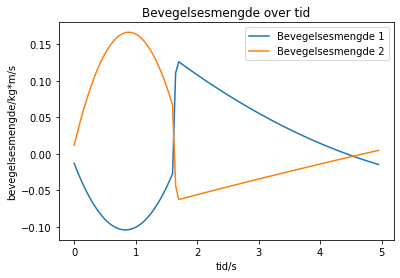

In [17]:
plt.plot(plot_x_1[:len(plot_x_1)-1], -(b1), label = "Bevegelsesmengde 1")
plt.plot(plot_x[:len(plot_x)-1], (b2), label = "Bevegelsesmengde 2")
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.legend()

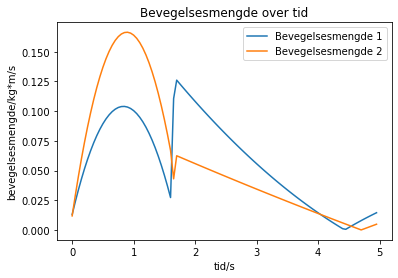

In [18]:
plt.plot(plot_x_1[:len(plot_x_1)-1], abs(b1), label = "Bevegelsesmengde 1")
plt.plot(plot_x[:len(plot_x)-1], abs(b2), label = "Bevegelsesmengde 2")
plt.xlabel("tid/s")
plt.ylabel("bevegelsesmengde/kg*m/s")
plt.title("Bevegelsesmengde over tid")
plt.legend()

Disse to siste grafene er de samme vi har sett på tidligere, bare denne gangen som fullstendinge regresjonsmodeller. Den første halvdelen har blitt plottet som en 2. grads funksjon. Selv om den gir en mer forutsigbar utvikling er det diskutabelt om den mer nøyaktig reptresenterer vognene i forsøket.